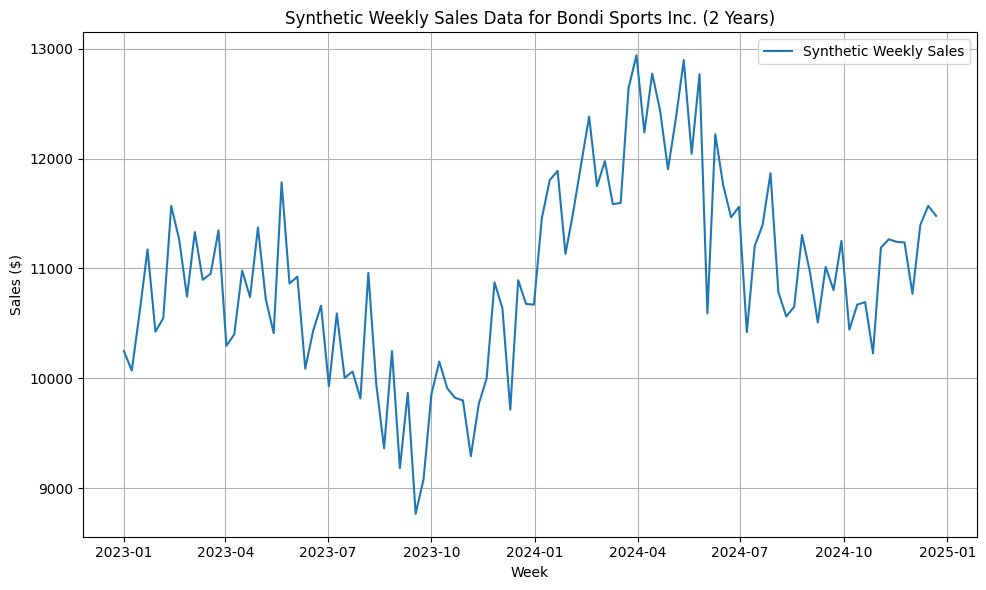

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate date range (weekly) for 2 years
weeks = pd.date_range(start='2023-01-01', periods=104, freq='W')

# Simulate components of sales
base_sales = 10000  # starting average weekly sales
trend = np.linspace(0, 2000, 104)  # linear upward trend over 2 years
seasonality = 1000 * np.sin(2 * np.pi * np.arange(104) / 52)  # annual seasonality
noise = np.random.normal(0, 500, 104)  # random variation

# Combine components
sales = base_sales + trend + seasonality + noise

# Create DataFrame
sales_df = pd.DataFrame({
    'Week': weeks,
    'Sales': sales
})

# Set 'Week' as index for time series structure
sales_df.set_index('Week', inplace=True)

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(sales_df.index, sales_df['Sales'], label='Synthetic Weekly Sales')
plt.title('Synthetic Weekly Sales Data for Bondi Sports Inc. (2 Years)')
plt.xlabel('Week')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


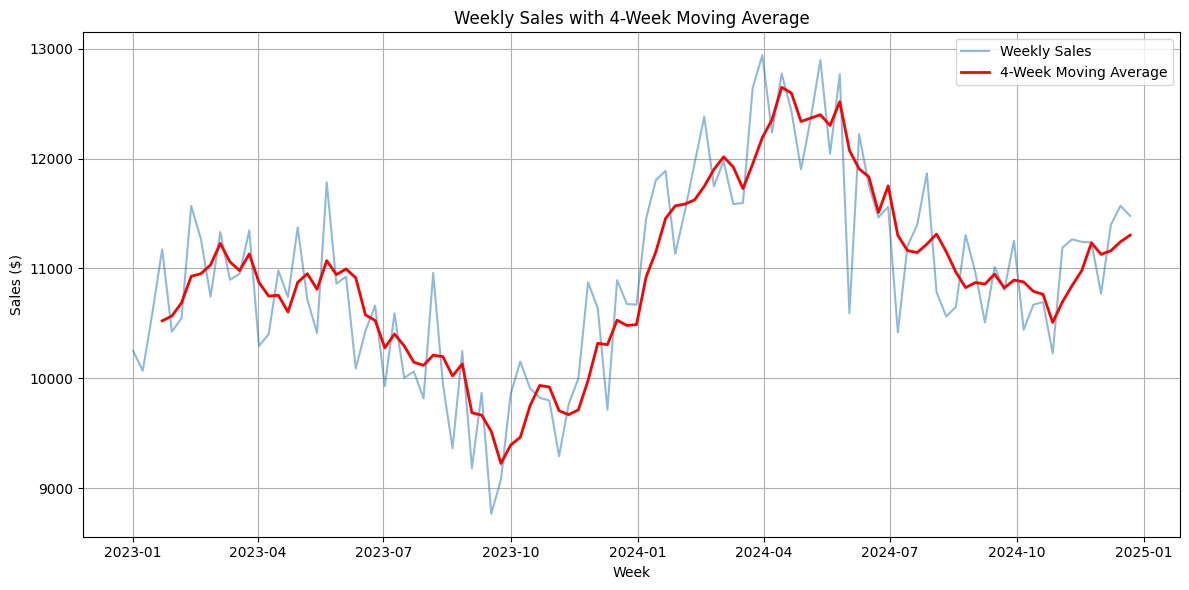

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Recreate the synthetic data if not already in memory)
np.random.seed(42)
weeks = pd.date_range(start='2023-01-01', periods=104, freq='W')
base_sales = 10000
trend = np.linspace(0, 2000, 104)
seasonality = 1000 * np.sin(2 * np.pi * np.arange(104) / 52)
noise = np.random.normal(0, 500, 104)
sales = base_sales + trend + seasonality + noise
sales_df = pd.DataFrame({'Week': weeks, 'Sales': sales})
sales_df.set_index('Week', inplace=True)

# Calculate Moving Average (window = 4 weeks)
sales_df['4-Week MA'] = sales_df['Sales'].rolling(window=4).mean()

# Plot Original Sales and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index, sales_df['Sales'], label='Weekly Sales', alpha=0.5)
plt.plot(sales_df.index, sales_df['4-Week MA'], label='4-Week Moving Average', linewidth=2, color='red')
plt.title('Weekly Sales with 4-Week Moving Average')
plt.xlabel('Week')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



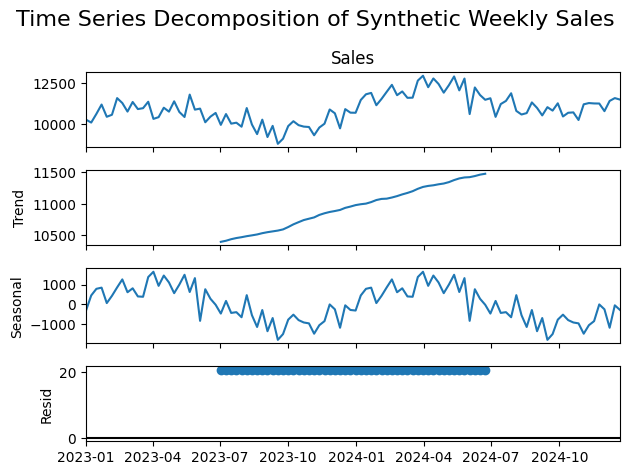

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Generate Synthetic Data ---
np.random.seed(42)
weeks = pd.date_range(start='2023-01-01', periods=104, freq='W')
base_sales = 10000
trend = np.linspace(0, 2000, 104)
seasonality = 1000 * np.sin(2 * np.pi * np.arange(104) / 52)
noise = np.random.normal(0, 500, 104)
sales = base_sales + trend + seasonality + noise
sales_df = pd.DataFrame({'Week': weeks, 'Sales': sales})
sales_df.set_index('Week', inplace=True)

# --- Time Series Decomposition ---
# Use multiplicative if the seasonal variation grows with level, otherwise additive
decomposition = seasonal_decompose(sales_df['Sales'], model='additive', period=52)

# --- Plot Decomposition ---
decomposition.plot()
plt.suptitle('Time Series Decomposition of Synthetic Weekly Sales', fontsize=16)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


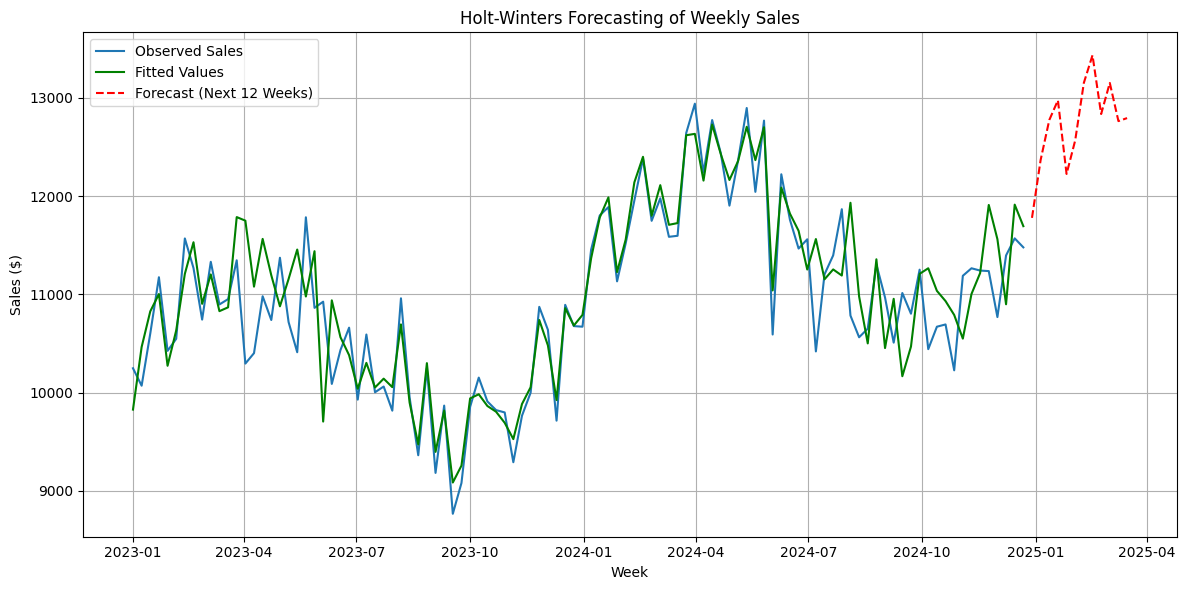

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Generate Synthetic Data (same as before) ---
np.random.seed(42)
weeks = pd.date_range(start='2023-01-01', periods=104, freq='W')
base_sales = 10000
trend = np.linspace(0, 2000, 104)
seasonality = 1000 * np.sin(2 * np.pi * np.arange(104) / 52)
noise = np.random.normal(0, 500, 104)
sales = base_sales + trend + seasonality + noise
sales_df = pd.DataFrame({'Week': weeks, 'Sales': sales})
sales_df.set_index('Week', inplace=True)

# --- Apply Holt-Winters Exponential Smoothing ---
model = ExponentialSmoothing(
    sales_df['Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=52  # yearly seasonality in weekly data
)

fit = model.fit()

# --- Forecast the next 12 weeks ---
forecast_period = 12
forecast = fit.forecast(forecast_period)

# --- Plot original data and forecast ---
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index, sales_df['Sales'], label='Observed Sales')
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(forecast.index, forecast, label='Forecast (Next 12 Weeks)', color='red', linestyle='--')
plt.title('Holt-Winters Forecasting of Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


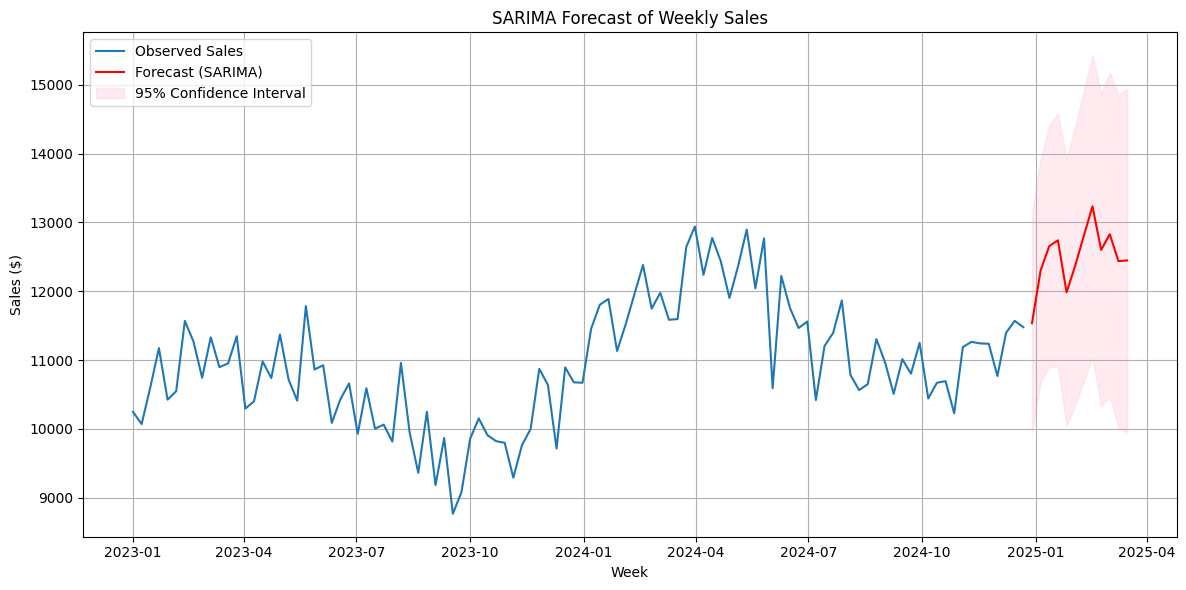

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# --- Generate Synthetic Weekly Sales Data ---
np.random.seed(42)
weeks = pd.date_range(start='2023-01-01', periods=104, freq='W')
base_sales = 10000
trend = np.linspace(0, 2000, 104)
seasonality = 1000 * np.sin(2 * np.pi * np.arange(104) / 52)
noise = np.random.normal(0, 500, 104)
sales = base_sales + trend + seasonality + noise

sales_df = pd.DataFrame({'Week': weeks, 'Sales': sales})
sales_df.set_index('Week', inplace=True)

# --- Fit SARIMA model ---
# SARIMA(p,d,q)(P,D,Q,s)
# p,d,q = ARIMA orders
# P,D,Q,s = Seasonal orders, s=52 for weekly data with yearly seasonality

sarima_model = SARIMAX(
    sales_df['Sales'],
    order=(1, 1, 1),           # ARIMA order
    seasonal_order=(1, 1, 1, 52),  # Seasonal order
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit(disp=False)

# --- Forecast next 12 weeks ---
forecast_steps = 12
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=sales_df.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index, sales_df['Sales'], label='Observed Sales')
plt.plot(forecast_index, forecast_values, label='Forecast (SARIMA)', color='red')
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)
plt.title('SARIMA Forecast of Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# save the data frame to csv file
sales_df.to_csv('sales_data.csv')